# Linear Regression
<p>
    In this project we work with a dataset available on Kaggle. The data includes information about customers of an e-commerce website, including the following:
<ul><li>Avg. Session Length: Average session of in-store style advice sessions.</li>
<li>Time on App: Average time spent on App in minutes</li>
<li>Time on Website: Average time spent on Website in minutes</li>
<li>Length of Membership: How many years the customer has been a member.</li>
</ul>
In this project, we suppose that the company is trying to decide whether to focus their efforts on their mobile app experience or their website. We are here to help them make a data-driven decision.
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and Exploring the data

In [2]:
df=pd.read_csv('ecommerce_customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# EDA 
 <p>
     In this section we are trying to find insights from the data through visualisation and correlation.
 </p> 
<br>

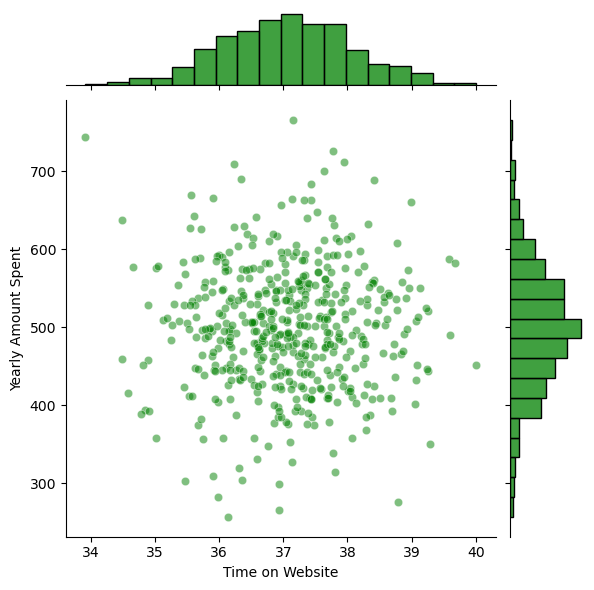

In [7]:
sns.jointplot(x="Time on Website",color='green', y= "Yearly Amount Spent", data=df,alpha=0.5)

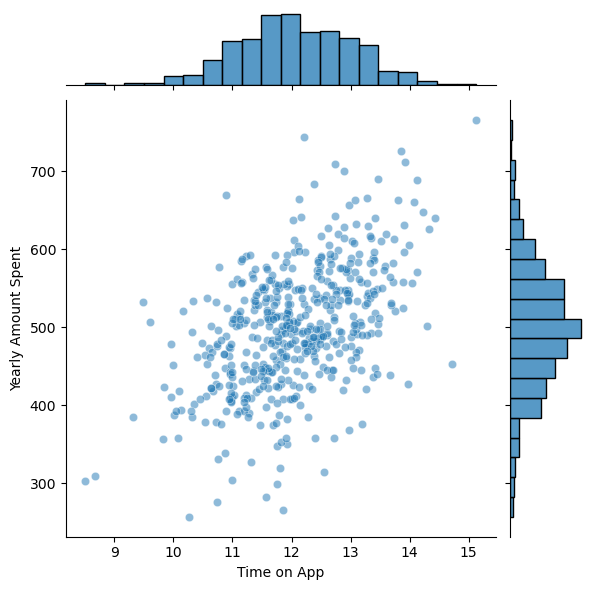

In [8]:
sns.jointplot(x="Time on App", y= "Yearly Amount Spent", data=df,alpha=0.5)

# Finding Correlation
<p>We are trying to find the correlation between the columns of the dataset.<br>
    By using Correlation Heatmap it is found that columns <B>Time on app</B> and <B>Length of Membership</b> have strong correaltion with target column <B>Yearly Amount Spent</B>
</p>
<br>

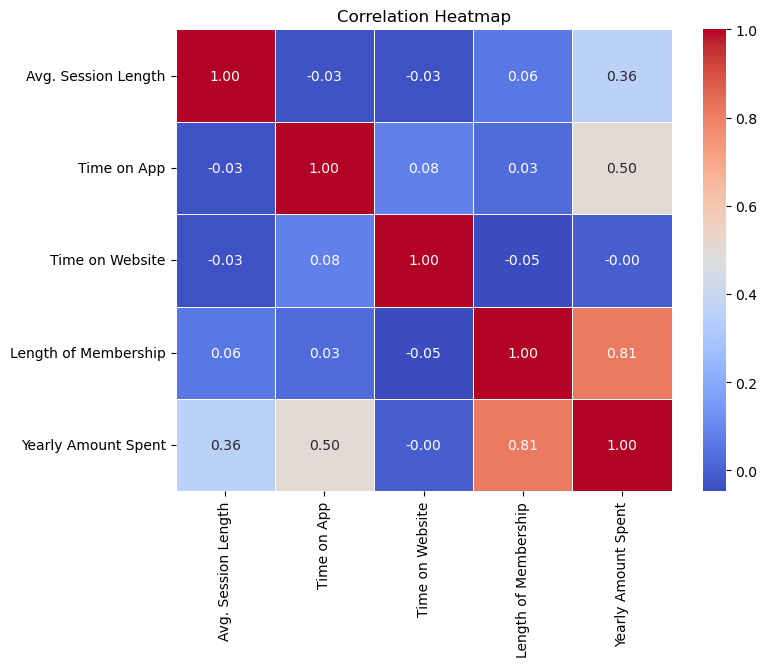

In [9]:
df_numeric = df.drop(columns=["Email", "Address", "Avatar"])

corr = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Graphical Visualisation of Correlation
<p>
    Using pairplot we can visually determine the correlation between the columns
</p>
<br>

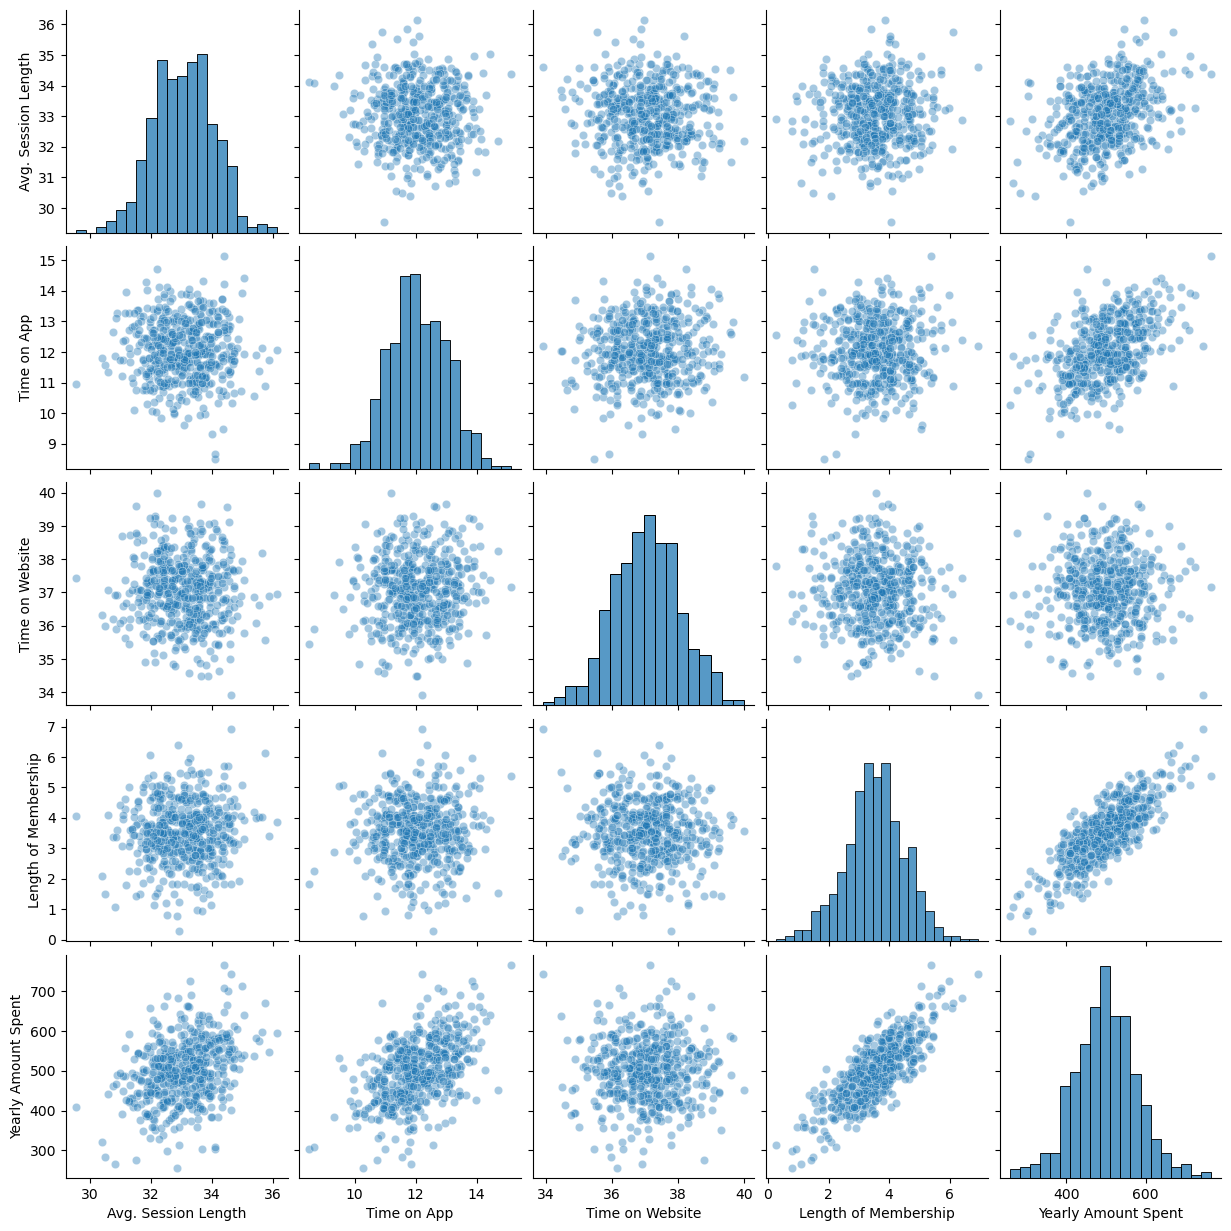

In [10]:
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.4})

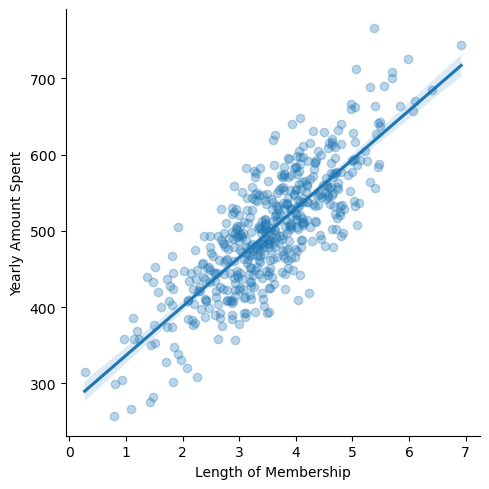

In [11]:
# Visual Example of Linear Regression
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=df,
           scatter_kws={'alpha':0.3})

# Creating Model
<p>
    Using Linear Regression Model from Scikit-Learn library we will implement Linear Regression
</p>

In [12]:
# Importing Library
from sklearn.model_selection import train_test_split

In [13]:
# Defining X and y datasets for model training
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [14]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [15]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [16]:
# Splitting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
# showing coefficients
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [21]:
# Length of Membership is the most crucial coefficient for our model
cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [53]:
# making predictions
predictions=model.predict(X_test)

In [55]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0, 0.5, 'Predicted Values')

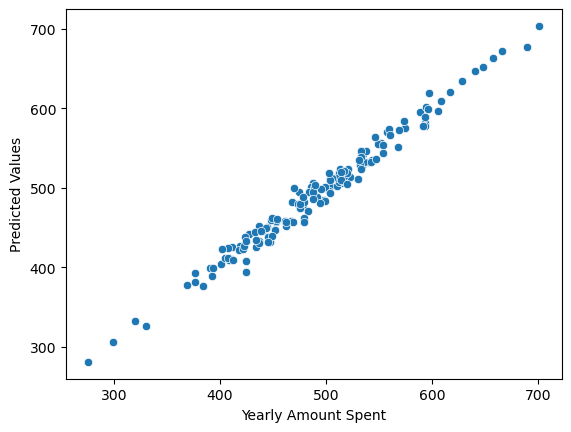

In [83]:
# Graph of Actual vs Predicted Value
sns.scatterplot(x=y_test,y=predictions)
plt.ylabel("Predicted Values")

In [73]:
# Model Score
model.score(X,y)

0.9842821675307222

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [96]:
# Metrics for our model
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432087
Mean Squared Error: 103.915541365033
Root Mean Squared Error: 10.193897260863139


# Conclusion
<p>
Interpreting the results of this analysis requires careful consideration. According to our model, the most significant factor influencing customer spending is not the time spent on the app or website but rather the length of membership. Among the two usage metrics (app vs. desktop), the app usage has the strongest influence, while time spent on the desktop website shows little to no correlation with spending.

This insight can be interpreted in two ways:

<ol>
<li>The desktop website may need improvements to enhance engagement and drive more sales.</li>

<li>Customers are generally more influenced by mobile applications, suggesting that businesses should focus more on optimizing their app experience.</li>
</ol>

Ultimately, making strategic decisions based on this analysis requires expertise in online marketing. However, our model effectively highlights the relative importance of different predictors, providing valuable insights for businesses looking to optimize customer engagement and spending.
</p>